In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('game data.csv')
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [14]:
df = df.drop('Days',axis = 1)

In [15]:
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Outlook       8 non-null      object
 1   Temprature    8 non-null      object
 2   Routine       8 non-null      object
 3   Wear Jacket?  8 non-null      object
dtypes: object(4)
memory usage: 388.0+ bytes


In [17]:
y = df['Wear Jacket?']

In [18]:
y.head()

0     No
1    Yes
2     No
3    Yes
4    Yes
Name: Wear Jacket?, dtype: object

In [19]:
x = df.drop('Wear Jacket?',axis = 1)
x.head()

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor


## Preprocessing

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

In [28]:
x.Outlook = le.fit_transform(x.Outlook)

In [29]:
x.head()

,Outlook,Temprature,Routine
0,1,Cold,Indoor
1,0,Cold,Indoor
2,0,Warm,Outdoor
3,1,Cold,Outdoor
4,0,Cold,Outdoor


In [31]:
x = x.rename(columns={'Temprature': 'Temperature'})


In [33]:
x.Temperature = le.fit_transform(x.Temperature)
x.Routine = le.fit_transform(x.Routine)

In [34]:
x.head()

,Outlook,Temperature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
clf = DecisionTreeClassifier()

In [35]:
clf.fit(x,y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [36]:
clf.predict([[1,0,0]])#1 = sunny, 0 = cold, 0 = indoor

C:\Users\Sohan\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [37]:
clf.predict([[1,0,1]])

C:\Users\Sohan\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

In [38]:
from sklearn import tree

TypeError: Figure.savefig() missing 1 required positional argument: 'fname'

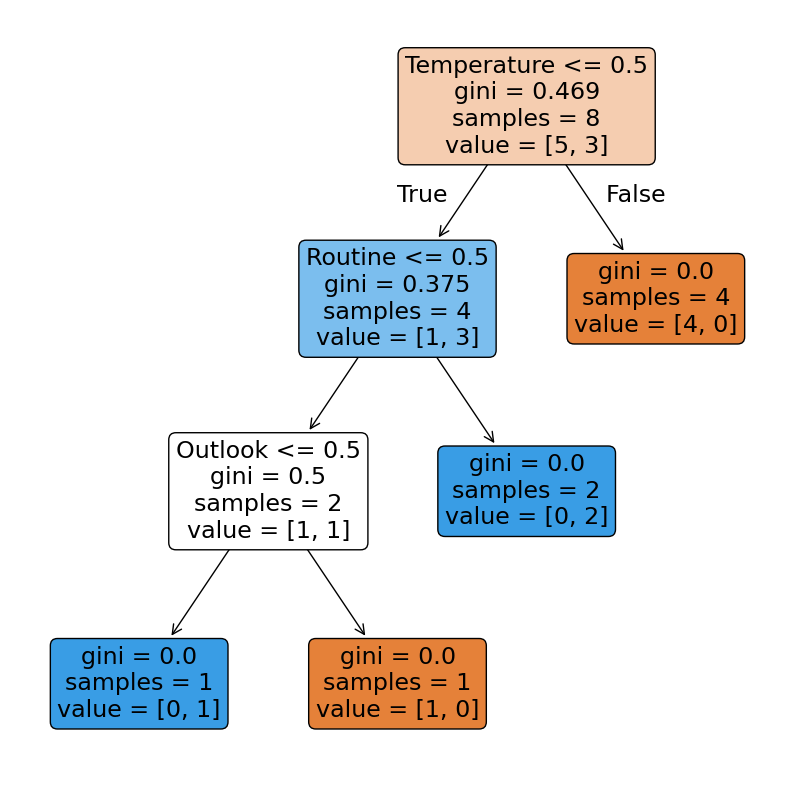

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x.columns)
plt.savefig()